# CSCI2000U - Scientific Data Analysis
# Final Project: **NBA MVP Predictor**

## **Project Group 16**
* **Hasan Chakaroun** - 100788546
* **Mohammad** - 100755461
* **Preet Panchal** - 100707094
* **Eihab Syed** - 100707448

### **Dataset Selected:** ###
- **Name:** NBA Players Data - all_seasons.csv
&nbsp;
- **Source:** https://www.kaggle.com/justinas/nba-players-data
&nbsp;
- **Reference:** Cirtautas, J. (2021, August 2). NBA players. Kaggle. Retrieved November 26, 2021, from https://www.kaggle.com/justinas/nba-players-data. 
&nbsp;
- **Creator:** Justinas Cirtautas, Data Scientist


## **INTRODUCTION**

## **DESCRIPTION OF DATASET**

## **ANALYSIS OF DATASET**

In [1]:
# importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
from datetime import datetime as dt
from collections import defaultdict

# importing seaborn
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('all_seasons.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()
# the dataframe
df = pd.DataFrame(data) 
df

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


,,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59411999999999,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59411999999999,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.14300000000000002,0.267,0.265,0.33299999999999996,0.0,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59411999999999,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59411999999999,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.11800000000000001,0.233,0.48200000000000004,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.5,90.7184,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.028999999999999998,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.79024,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.09699999999999999,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.52228000000001,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011000000000000001,0.073,0.179,0.597,0.07400000000000001,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.2,98.88305600000001,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.19399999999999998,0.614,0.055999999999999994,2020-21


### **Quality of Dataset:**
- 

### **Data Cleaning:** 

In [2]:
# removing additional placeholder/column for index
df.drop(columns=[''], inplace=True)
df['college'] = df['college'].replace(['None'],'No College')
df['player_height'] = df['player_height'].astype(float)
df['player_weight'] = df['player_weight'].astype(float)
df['age'] = df['age'].astype(float).astype(int)
df['pts'] = df['pts'].astype(float)
df['reb'] = df['reb'].astype(float)
df['ast'] = df['ast'].astype(float)
df[:5]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.14300000000000002,0.267,0.265,0.33299999999999996,0.0,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,No College,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.11800000000000001,0.233,0.48200000000000004,0.114,1996-97


### **Code & Analysis of Basic Characteristics of Dataset:** 


In [3]:
# displaying the total number of data using string and len inbuilt python function
print("There are " + str(len(data)) + " data records in all_seasons.csv. ")

There are 11700 data records in all_seasons.csv. 


In [4]:
print("Q2) Here are the top 5 data records: ")
print(data[:5]) # using indexing to display the first 5 records

Q2) Here are the top 5 data records: 
[{'': '0', 'player_name': 'Travis Knight', 'team_abbreviation': 'LAL', 'age': '22.0', 'player_height': '213.36', 'player_weight': '106.59411999999999', 'college': 'Connecticut', 'country': 'USA', 'draft_year': '1996', 'draft_round': '1', 'draft_number': '29', 'gp': '71', 'pts': '4.8', 'reb': '4.5', 'ast': '0.5', 'net_rating': '6.2', 'oreb_pct': '0.127', 'dreb_pct': '0.182', 'usg_pct': '0.142', 'ts_pct': '0.536', 'ast_pct': '0.052000000000000005', 'season': '1996-97'}, {'': '1', 'player_name': 'Matt Fish', 'team_abbreviation': 'MIA', 'age': '27.0', 'player_height': '210.82', 'player_weight': '106.59411999999999', 'college': 'North Carolina-Wilmington', 'country': 'USA', 'draft_year': '1992', 'draft_round': '2', 'draft_number': '50', 'gp': '6', 'pts': '0.3', 'reb': '0.8', 'ast': '0.0', 'net_rating': '-15.1', 'oreb_pct': '0.14300000000000002', 'dreb_pct': '0.267', 'usg_pct': '0.265', 'ts_pct': '0.33299999999999996', 'ast_pct': '0.0', 'season': '1996-9

In [5]:
# creating a set with all the player names from data to only include each unique team with no repeats
unique_name = {player['player_name'] for player in data}
# then displaying the length of unique_name as a string
print("There are " + str(len(unique_name)) + " unique NBA player names in the dataset. Therefore, there are " + str(len(unique_name)) + " players that played in the National Basketball Association since 1996.\n")
print("Here are the first 100 player names from the unique_name dict. (List was too long to print completely): ")
print(list(unique_name)[:50])

There are 2333 unique NBA player names in the dataset. Therefore, there are 2333 players that played in the National Basketball Association since 1996.

Here are the first 100 player names from the unique_name dict. (List was too long to print completely): 
['Naz Mitrou-Long', 'Mike Taylor', 'Tyus Jones', 'Tremont Waters', 'Sheldon Mac', 'Theo Pinson', 'Quincy Douby', 'Gary Neal', 'Andre Emmett', 'Landry Fields', 'Chris Chiozza', 'Isaiah Briscoe', 'Kalin Lucas', 'Cedric Simmons', 'Will Magnay', 'Oliver Lafayette', 'Darius Morris', 'Payton Pritchard', 'Toby Bailey', 'Naz Reid', 'Aaron Miles', 'James Robinson', 'Lavoy Allen', 'Stacey King', 'Alex Garcia', 'Lance Stephenson', 'Rodney McGruder', 'Brian Bowen II', 'Tre Jones', 'Greg Buckner', 'Antonio Harvey', 'Omri Casspi', 'Olumide Oyedeji', 'Zendon Hamilton', 'Justin Anderson', 'Michael Redd', 'C.J. Williams', 'Scott Williams', 'Boniface Ndong', 'Sam Dekker', 'Grant Jerrett', 'Robert Franks', 'Thomas Robinson', 'DeVaughn Akoon-Purcell', 

In [6]:
# creating a set with all the teams from data to only include each unique team with no repeats
unique_team = {team['team_abbreviation'] for team in data}
# then displaying the length of unique_team as a string
print("Not all team names in the dataset are unique. There are " + str(len(unique_team)) + " unique NBA teams in the dataset. Therefore, there are " + str(len(unique_team)) + " teams that take part in the National Basketball Association since 1996.")
print(unique_team)

Not all team names in the dataset are unique. There are 36 unique NBA teams in the dataset. Therefore, there are 36 teams that take part in the National Basketball Association since 1996.
{'DAL', 'BOS', 'POR', 'CLE', 'CHH', 'BKN', 'PHX', 'DET', 'PHI', 'DEN', 'IND', 'WAS', 'SAC', 'ATL', 'MIL', 'OKC', 'TOR', 'VAN', 'CHA', 'MEM', 'NYK', 'HOU', 'MIA', 'ORL', 'SEA', 'LAL', 'LAC', 'NOP', 'SAS', 'NOH', 'NOK', 'CHI', 'MIN', 'NJN', 'UTA', 'GSW'}


In [7]:
# creating a set with all the colleges from data to only include each unique college with no repeats
unique_college = {player['college'] for player in data}
# then displaying the length of unique_college as a string
print("Not all college names in the dataset are unique. There are " + str(len(unique_college)) + " unique colleges where the NBA players played before coming to the NBA in the dataset.\n")
print("Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): ")
print(list(unique_college)[:50])

Not all college names in the dataset are unique. There are 336 unique colleges where the NBA players played before coming to the NBA in the dataset.

Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): 
['Barton Community College', 'Iowa State', 'Louisiana-Monroe', '                                   ', 'TCU', 'Hofstra', 'Tennessee State', 'George Mason', 'North Carolina-Wilmington', 'Alabama', 'Oklahoma', 'S.E. Missouri', 'Saint Louis', 'Ohio', 'Fayetteville State', 'Southern Methodist', 'Radford', 'Austin Peay', 'Norfolk State', 'Iowa', 'Augusta State', 'Texas-Austin', 'North Dakota', 'Long Island-Brooklyn', "St. John's (NY)", 'Temple', 'University of Texas at Austin', "Saint Joseph's", 'Detroit Mercy', 'South Dakota State', 'Eastern Illinois', 'Wisconsin-Stevens Point', 'Northwest Florida State', 'University of California, Berkeley', 'Iona', 'Northern Illinois', 'Duquesne', 'Mercer', 'Oakland', 'Western Michigan', 'Virginia Military

In [8]:
# creating a set with all the countries from data to only include each unique country with no repeats
unique_country = {player['country'] for player in data}
# then displaying the length of unique_country as a string
print("Not all country names in the dataset are unique. There are " + str(len(unique_country)) + " unique countries that the NBA players originated from in the dataset.\n")
print(unique_country)

Not all country names in the dataset are unique. There are 79 unique countries that the NBA players originated from in the dataset.

{'Croatia', 'Tunisia', 'Japan', 'South Sudan', 'Senegal', 'Poland', 'Argentina', 'Cameroon', 'Uruguay', 'Nigeria', 'Turkey', 'Venezuela', 'Bosnia', 'Dominican Republic', 'Tanzania', 'Bosnia and Herzegovina', 'New Zealand', 'Scotland', 'Italy', 'Czech Republic', 'Bosnia & Herzegovina', 'Mexico', 'Congo', 'China', 'U.S. Virgin Islands', 'Guinea', 'Gabon', 'Canada', 'Jamaica', 'Montenegro', 'Haiti', 'Puerto Rico', 'Finland', 'Iran', 'Saint Lucia', 'Germany', 'St. Vincent & Grenadines', 'USA', 'Sudan (UK)', 'Ukraine', 'France', 'Yugoslavia', 'South Korea', 'Greece', 'Sudan', 'Belize', 'Serbia and Montenegro', 'Austria', 'Australia', 'Israel', 'DRC', 'Georgia', 'Macedonia', 'United Kingdom', 'Great Britain', 'Angola', 'Sweden', 'US Virgin Islands', 'Bahamas', 'Democratic Republic of the Congo', 'Russia', 'Ireland', 'Slovenia', 'Serbia', 'Brazil', 'Latvia', 'US

In [9]:
'''
Running the dataRangeFunc() by calling the 'reduce' function to display the range of years. 
'''

# created a reducer function to loop through all the numerical years of the data
def dataRangeFunc(state, player):
    # compute a list of all the years
    if state is None:
        state = {
        'min_year': player['season'].split('-')[0],
        'max_year': player['season'].split('-')[0]
        }
    # continually update the 'min_year' & 'max_year'
    else:
        state['min_year'] = min(state['min_year'], player['season'].split('-')[0])
        state['max_year'] = max(state['max_year'], player['season'].split('-')[0])

    return state

# run the reducer function and output 'min_year' and 'max_year' to display our range
print("Here is the dataset's range of years, in other words, the season range (oldest and newest): ")
reduce(dataRangeFunc, data, None)['min_year'] + " to " + reduce(dataRangeFunc, data, None)['max_year']

Here is the dataset's range of years, in other words, the season range (oldest and newest): 


'1996 to 2020'

## **EXPLORATORY DATA ANALYSIS**

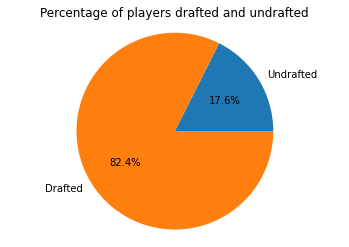

In [10]:
# 1) Calculate the percentage of players that were undrafted. 
#    * To see how many and what players were talented enough to directly sign with an NBA team instead of being drafted.
draft_status_quantitiy = []
draft_status_quantitiy.append(len(df[df['draft_year'] == 'Undrafted']))
draft_status_quantitiy.append(len(df) - len(df[df['draft_year'] == 'Undrafted']))
my_labels = 'Undrafted','Drafted'
plt.pie(draft_status_quantitiy,labels=my_labels,autopct='%1.1f%%')
plt.title('Percentage of players drafted and undrafted')
plt.axis('equal')
plt.show();

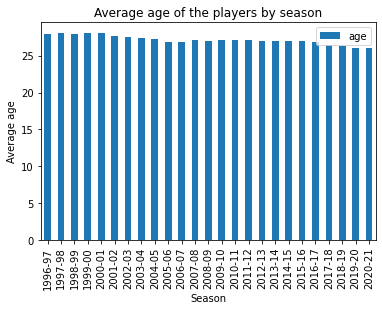

In [18]:
# 2) What is the average age of the players by season?
age_per_season = df.groupby(["season"]).mean().sort_values(by='season', ascending=True).reset_index()
age_per_season.plot(kind='bar', y='age', x='season', title='Average age of the players by season', xlabel='Season', ylabel='Average age');

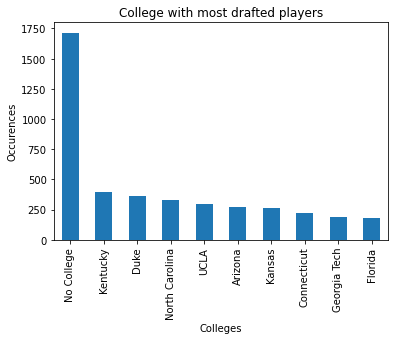

In [28]:
# 3) Find the top 5 colleges. 
#     * To see which colleges most players played for before coming to the NBA.
plt.title('College with most drafted players')
plt.xlabel('Colleges')
plt.ylabel('Occurences')
df["college"].value_counts()[:10].plot.bar();

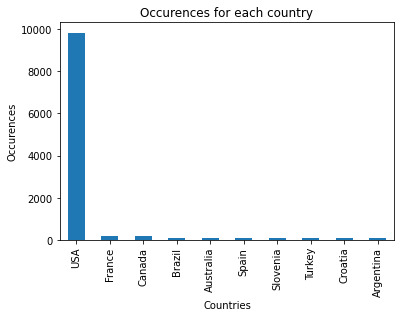

In [31]:
# 4) Find the top 5 countries NBA players are from. 
#     * To see what percentage of players from each unique country
plt.title('Occurences for each country')
plt.xlabel('Countries')
plt.ylabel('Occurences')
df["country"].value_counts()[:10].plot.bar();

In [179]:
# 5) Compare first-round, number-one player picks from each draft year.
#     * To find out whether there were any NBA busts from the draft. 
#df[df['draft_number'] == '1']

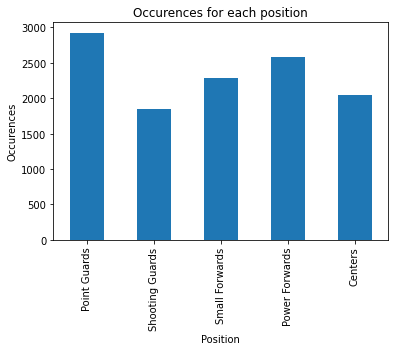

In [180]:
# 6) Determine the position of each player (since it's not provided in the dataset). 
#     * To find the average height per position. 
average_height_PG = 190.5
average_height_SG = 195.58
average_height_SF = 203.2
average_height_PF = 205.74
average_height_C = 210.82

positions_dict = {"Point Guards": 0, "Shooting Guards": 0, "Small Forwards": 0, "Power Forwards": 0, "Centers": 0}

positions_dict["Point Guards"] = len(df[df['player_height'] <= (average_height_PG + average_height_SG) / 2])
positions_dict["Shooting Guards"] = len(df[(df['player_height'] <= (average_height_SF + average_height_SG) / 2) & (df['player_height'] > (average_height_PG + average_height_SG) / 2)])
positions_dict["Small Forwards"] = len(df[(df['player_height'] <= (average_height_PF + average_height_SF) / 2) & (df['player_height'] > (average_height_SF + average_height_SG) / 2)])
positions_dict["Power Forwards"] = len(df[(df['player_height'] <= (average_height_C + average_height_PF) / 2) & (df['player_height'] > (average_height_SF + average_height_PF) / 2)])
positions_dict["Centers"] = len(df[df['player_height'] > (average_height_PF + average_height_C) / 2])

positions = pd.Series(positions_dict)
plt.title('Occurences for each position')
plt.xlabel('Position')
plt.ylabel('Occurences')
positions.plot.bar();

In [181]:
# 7) Does the player's weight affect their performance? 

In [226]:
# 8) Who is the longest active player in the league? 
player_longest_career = df.groupby(["player_name"]).sum().sort_values(by='age', ascending=False).reset_index()
player_longest_career
#player_longest_career[:5].plot(kind='bar', y='age', x='player_name', title='Longest active player', xlabel='Players', ylabel='age');

,player_name,age,player_height,player_weight,pts,reb,ast
0,Vince Carter,715,4363.72,2199.921200,359.6,93.0,65.4
1,Dirk Nowitzki,651,4478.02,2322.844632,422.3,154.3,49.1
2,Kevin Garnett,610,4216.40,2133.696768,347.0,196.6,72.6
3,Jamal Crawford,610,3911.60,1762.204920,278.6,41.6,67.3
4,Tim Duncan,589,4023.36,2209.446632,358.9,204.6,57.2
...,...,...,...,...,...,...,...
2328,Aleksej Pokusevski,19,213.36,86.182480,8.2,4.7,2.2
2329,Patrick Williams,19,200.66,97.522280,9.2,4.6,1.4
2330,Anthony Edwards,19,193.04,102.058200,19.3,4.7,2.9
2331,Killian Hayes,19,195.58,88.450440,6.8,2.7,5.3


In [ ]:
# 9) Find the player with the most points, rebounds, and assists, respectively, of all-time. 
player_name = df['player_name'].unique()
players_score_dict = {}
for player in player_name:
    temp = {}
    temp["points"] = df[df['player_name'] == player]['pts'].mean().round(decimals=2)
    temp["assists"] = df[df['player_name'] == player]['ast'].mean().round(decimals=2)
    temp["rebounds"] = df[df['player_name'] == player]['reb'].mean().round(decimals=2)
    players_score_dict[player] = temp
players_score = pd.DataFrame(players_score_dict).transpose()
player_highest_pts = df.groupby(["player_name"]).mean().sort_values(by='pts', ascending=False).reset_index()
player_highest_ast = df.groupby(["player_name"]).mean().sort_values(by='ast', ascending=False).reset_index()
player_highest_reb = df.groupby(["player_name"]).mean().sort_values(by='reb', ascending=False).reset_index()

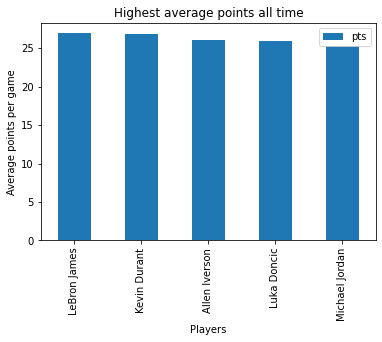

In [216]:
player_highest_pts[:5].plot(kind='bar', y='pts', x='player_name', title='Highest average points all time', xlabel='Players', ylabel='Average points per game');

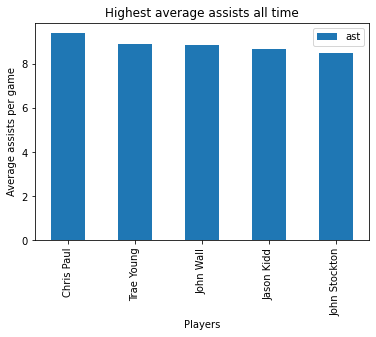

In [217]:
player_highest_ast[:5].plot(kind='bar', y='ast', x='player_name', title='Highest average assists all time', xlabel='Players', ylabel='Average assists per game');

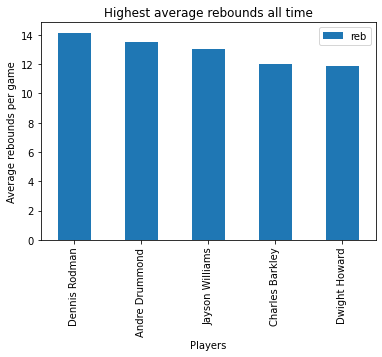

In [218]:
player_highest_reb[:5].plot(kind='bar', y='reb', x='player_name', title='Highest average rebounds all time', xlabel='Players', ylabel='Average rebounds per game');

In [231]:
# 10) All-Star player from each unique country? (All-Star player defined as pts: 25+, reb: 5+, ast: 5+). 
players = defaultdict(int)
data_science_df = df.groupby(["player_name"]).mean()
def all_star_checker(player):
    if (player['points'] >= 18) & (player['assists'] >= 4) & (player['rebounds'] >= 4):
        return 1
    else:
        return 0

def drafted_checker(player):
    if (player['draft_year'] == "Undrafted"):
        return 1
    else:
        return 0

def check_all_star(player):
    if (player['pts'] >= 18) & (player['ast'] >= 4) & (player['reb'] >= 4):
        return 1
    else:
        return 0

players_score["All_Star"] = players_score.apply(all_star_checker, axis=1)
data_science_df["All_Star"] = data_science_df.apply(check_all_star, axis=1)
data_science_df["Drafted"] = data_science_df.apply(check_all_star, axis=1)

,age,player_height,player_weight,pts,reb,ast,All_Star
player_name,,,,,,,
Blake Griffin,27.000000,207.818182,113.727885,20.236364,8.127273,4.290909,1
Chris Paul,28.500000,183.038750,79.378600,18.287500,4.512500,9.400000,1
Chris Webber,29.500000,208.280000,111.130040,19.550000,9.458333,4.108333,1
Clyde Drexler,35.500000,200.660000,100.697424,18.200000,5.450000,5.600000,1
Damian Lillard,26.000000,189.935556,88.450440,24.922222,4.188889,6.666667,1
Donovan Mitchell,22.500000,187.960000,97.522280,23.675000,4.150000,4.350000,1
Dwyane Wade,29.500000,193.040000,98.656260,21.831250,4.637500,5.387500,1
Giannis Antetokounmpo,22.500000,210.185000,102.851986,21.437500,9.337500,4.550000,1
James Harden,25.500000,195.580000,99.979237,25.091667,5.533333,6.650000,1


## **POTENTIAL DATA SCIENCE**

In [ ]:
# For Data Science Application
import sys
!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [155]:
print(players_score.All_Star.value_counts())

0    2313
1      20
Name: All_Star, dtype: int64


In [156]:
y = players_score['All_Star']
y

Travis Knight      0
Matt Fish          0
Matt Bullard       0
Marty Conlon       0
Martin Muursepp    0
                  ..
Malachi Flynn      0
Malik Fitts        0
Mamadi Diakite     0
Markus Howard      0
Mason Jones        0
Name: All_Star, Length: 2333, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(players_score['text'], y, test_size = 0.25, random_state = 0)

## **CONCLUSION**

## **Description of Dataset:**

The chosen dataset contains over two decades of statistics about each player that has been a part of the NBA (National Basketball Association). It is comprised of many variables including player age, height, weight, college attended, country born and game box scores. There are 22 data attributes in total offering a great range for data analysis.

It was collected through the official NBA website and https://www.basketball-reference.com/ found via Kaggle from Justinas Cirtautas (https://www.kaggle.com/justinas/nba-players-data). This dataset represents the the details of each NBA player for each season from 1996 to 2021. 

### Here are the 22 attributes/columns in this dataset:

* index                - Player index / Row number
* player_name          - Name of player
* team_abbreviation    - Abbreviated name of the team the player played for
* age                  - Age of player
* player_height        - Height of the player (cm)
* player_weight        - Weight of the player (kg)
* college              - Name of the college player attended
* country              - Name of the country player was born in
* draft_year           - The year the player was drafted
* draft_round          - The draft round the player was picked
* draft_number         - The draft number at which the player was picked in his draft round
* gp                   - Games played throughout the season
* pts                  - Average number of points scored
* reb                  - Average number of rebounds grabbed
* ast                  - Average number of assists distributed
* net_rating           - Team’s point differential/100 possessions while player is on court
* oreb_pct             - % of available offensive rebounds the player grabbed on court
* dreb_pct             - % of available defensive rebounds the player grabbed on court
* usg_pct              - % of team plays used by the player while on court
* ts_pct               - Measure of player’s shooting efficiency
* ast_pct              - % of teammate field goals the player assisted on court
* season               - NBA season

## **Proposal & Motivation:**



### Why we chose this dataset?

As big fans of the NBA and the sport of basketball, we found this dataset very interesting. There is a lot of interesting information regarding all the NBA players over the years and we are excited to study research questions pertaining to all players in the league. Unlike other datasets, this one is actually a topic of interest for us and gives us the opportunity to both practice data analysis and learn more about the sport we love!

### Another dataset we considered:

Yes! We were originally going to use another NBA dataset (https://www.kaggle.com/nathanlauga/nba-games?select=games.csv). It also had some very insightful data, however, we felt that it was far more focused on the NBA team's performances, rather than the players. As a group, we were more interested to research the data of the players to visualize talent existent within the league since 1996. 

## **Data Analysis Questions:**

### Here are a few tentative questions that we would like to study for this dataset: 

1) Calculate the percentage of players that were undrafted. 
    * To see how many and what players were talented enough to directly sign with an NBA team instead of being drafted.
2) What is the average age of the players by season?
3) Find the top 5 colleges. 
    * To see which colleges most players played for before coming to the NBA.
4) Find the top 5 countries NBA players are from. 
    * To see what percentage of players from each unique country
5) All-Star player from each unique country? (All-Star player defined as pts: 25+, reb: 7+, ast: 7+). 
6) Compare first-round, number-one player picks from each draft year.
    * To find out whether there were any NBA busts from the draft. 
7) Determine the position of each player (since it's not provided in the dataset). 
    * To find the average height per position. 
8) Does the player's weight affect their performance? 
9) Who is the longest active player in the league? 
10) Find the player with the most points, rebounds, and assists, respectively, of all-time. 

### Methods to Apply to Answer the above: 

To begin, we will utilize Python's in-built libraries extensively and use multiple functions such as, 'map', 'filter', and 'reduce'. We plan to primarily Numpy for the programming of most of the data as it is mostly comprised of numerical values. However, we expect to learn new things in the near future of this course, including Pandas and Mathplotlib. Both Pandas and Mathplotlib will help greatly to visualize and process the data in different aspects using graphs and charts. Furthermore, we will analyze the data using mathematical, statistical analysis, and attributes to complete conclusions to our questions of research.  

### Potential for Data Science Applications: 

There is great potential to apply our knowledge of data science and translate it to the data of NBA players. We can predict players' performance and development over their NBA career. In a real-life scenario, we can recommend colleges to those interested to join the NBA for their future. We can also simulate the players' projected growth (whether they will become an all-star) and work with the coaching staff to provide them with such information, so they can make the essential adjustments to players' training and development. Most importantly, we would be able to visualize the diversity of players within the NBA. 

External Links


http://www.draftexpress.com/average-measurements-by-position/all/NBA+Draft+Combine/all/all/
